In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
data = pd.read_csv('drive/MyDrive/EnemyData/enemy_training_data.csv')

In [ ]:
data.head()

,distance,enemyVel
0,200.00000,1.862671
1,200.00005,1.855621
2,200.00015,1.872986
3,200.00030,1.859100
4,200.00053,1.854736


In [ ]:
data = data.sort_values(by="distance").reset_index(drop=True)


In [ ]:
data = torch.tensor(data.values, dtype=torch.float32)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
X_train = data[:, 0].view(-1, 1)
Y_train = data[:, 1].view(-1, 1)

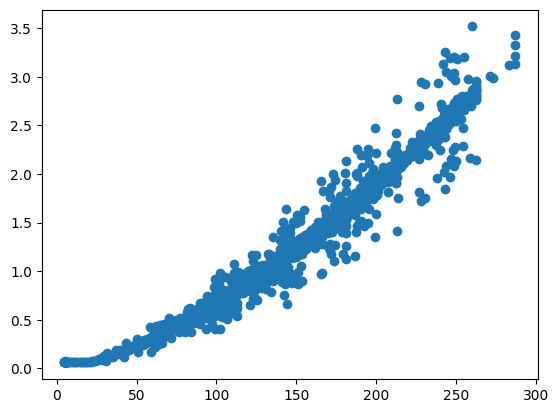

In [ ]:
plt.scatter(X_train.cpu(), Y_train.cpu())
plt.show()

In [ ]:
X_mean = X_train.mean()
Y_mean = Y_train.mean()
X_std = X_train.std()
Y_std = Y_train.std()

In [ ]:
X_train = (X_train - X_mean) / X_std
Y_train = (Y_train - Y_mean) / Y_std

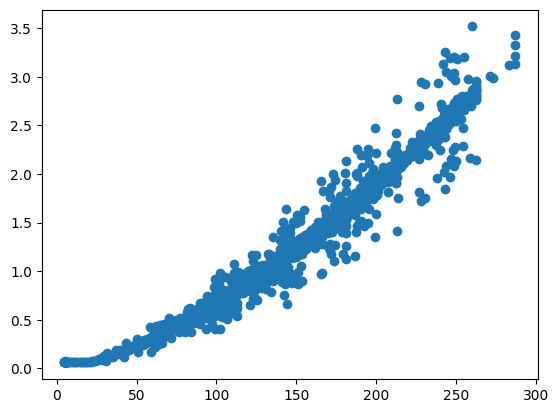

In [ ]:
plt.scatter(X_train.cpu(), Y_train.cpu())
plt.show()

In [ ]:
lr = 0.01

In [ ]:
def makeParam(*shape):
  return torch.normal(0.1, 0.1, shape, device= device, requires_grad=True, dtype=torch.float32)

In [ ]:
hidden = 15

w1 = makeParam(1, hidden)
b1 = makeParam(hidden)
w2 = makeParam(hidden, 1)
b2 = makeParam(1)

In [ ]:
def model(x):
  l1 = x@w1+b1
  l1 = torch.relu(l1)
  l2 = l1@w2+b2
  return l2

In [ ]:
def loss(y_pred, y):
  return ((y-y_pred)**2).mean()

In [ ]:
def update():
  global w1, w2, b1, b2

  with torch.no_grad():
    w1 -= w1.grad*lr
    w2 -= w2.grad*lr
    b1 -= b1.grad*lr
    b2 -= b2.grad*lr

  w1.grad.zero_()
  w2.grad.zero_()
  b1.grad.zero_()
  b2.grad.zero_()

In [ ]:
losses = []

In [ ]:
for i in range(100):
  X_train = X_train.to(device)
  Y_train = Y_train.to(device)
  pred = model(X_train)
  l = loss(pred, Y_train)
  l.backward()

  update()
  losses.append(l.item())

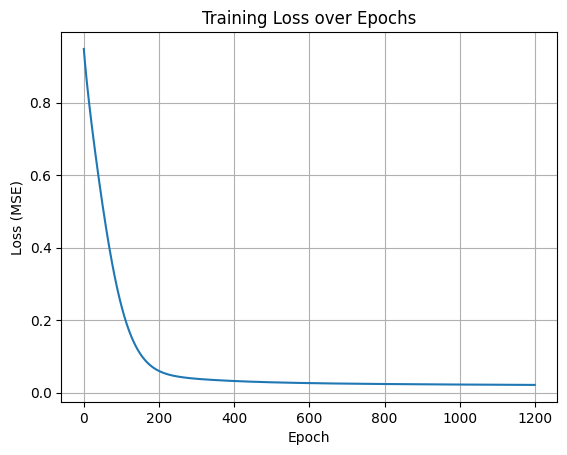

In [ ]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()


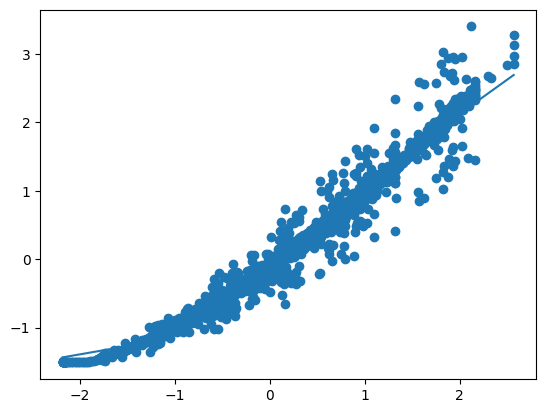

In [ ]:
plt.scatter(X_train.cpu(), Y_train.cpu())
plt.plot(X_train.cpu(), model(X_train).detach().cpu())
plt.show()

In [ ]:
np.savetxt('w1.csv', w1.detach().cpu(), delimiter=',')
np.savetxt('b1.csv', b1.detach().cpu(), delimiter=',')
np.savetxt('w2.csv', w2.detach().cpu(), delimiter=',')
np.savetxt('b2.csv', b2.detach().cpu(), delimiter=',')

np.savetxt('X_mean.csv', X_mean.unsqueeze(0).cpu(), delimiter=',')
np.savetxt('X_std.csv', X_std.unsqueeze(0).cpu(), delimiter=',')
np.savetxt('Y_mean.csv', Y_mean.unsqueeze(0).cpu(), delimiter=',')
np.savetxt('Y_std.csv', Y_std.unsqueeze(0).cpu(), delimiter=',')

In [ ]:
x = 300
x = ((x-X_mean)/X_std).view(-1, 1)
y = model(x)
y = (y*Y_std)+Y_mean
y



tensor([[3.1725]], grad_fn=<AddBackward0>)